In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
titanic_data = pd.read_csv('D:data/titanic/train.csv')

In [3]:
# Проверяем на наличие пропущенных значений
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Отбираем данные для обучения и тестирования
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [5]:
# Переводим данные из строковых значений в числовые
X = pd.get_dummies(X)

In [6]:
# В пропущенных значениях столбца 'Age' указываем медианное значение по этому столбцу
X = X.fillna({'Age': X.Age.median()})

In [7]:
# Проверяем обучающие данные
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [8]:
# Выбираем и тренируем дерево
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [10]:
clf.score(X, y)

0.9797979797979798

[Text(0.43620728417266186, 0.975, 'X[6] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.16434352517985612, 0.925, 'X[0] <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(0.06115107913669065, 0.875, 'X[4] <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(0.046762589928057555, 0.825, 'X[4] <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(0.039568345323741004, 0.775, 'X[1] <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]'),
 Text(0.03237410071942446, 0.725, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.046762589928057555, 0.725, 'X[1] <= 27.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]'),
 Text(0.02877697841726619, 0.675, 'X[1] <= 25.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(0.014388489208633094, 0.625, 'X[4] <= 13.75\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.007194244604316547, 0.575, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.02158273381294964, 0.5

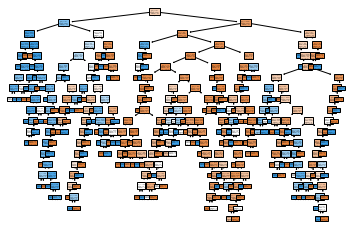

In [11]:
# Визуализируем полученное дерево чтобы оценить его размер
tree.plot_tree(clf, filled=True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Разделяем данные на обучающие и тестирующие
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [14]:
# Выбираем и тренируем дерево уже с указанными параметрами
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [17]:
clf.score(X_train, y_train)

0.8070469798657718

In [18]:
clf.score(X_test, y_test)

0.847457627118644

In [19]:
# Создаем цикл для наглядного изучения зависимости точности дерева от его глубины

In [20]:
max_depth_values = range(1, 100)

In [21]:
scores_data = pd.DataFrame()

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [24]:
scores_data.head(7)

,max_depth,train_score,test_score,cross_val_score
0,1,0.771812,0.816949,0.771751
0,2,0.771812,0.816949,0.761681
0,3,0.807047,0.847458,0.786849
0,4,0.808725,0.847458,0.781821
0,5,0.825503,0.847458,0.773445
0,6,0.852349,0.833898,0.796905
0,7,0.857383,0.813559,0.780112


In [25]:
# Преобразуем таблицу scores_data для удобной визуализации на графике
scores_data_long = pd.melt(scores_data, id_vars='max_depth', value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')


In [26]:
scores_data_long.query("set_type == 'cross_val_score'").head()

,max_depth,set_type,score
198,1,cross_val_score,0.771751
199,2,cross_val_score,0.761681
200,3,cross_val_score,0.786849
201,4,cross_val_score,0.781821
202,5,cross_val_score,0.773445


<AxesSubplot:xlabel='max_depth', ylabel='score'>

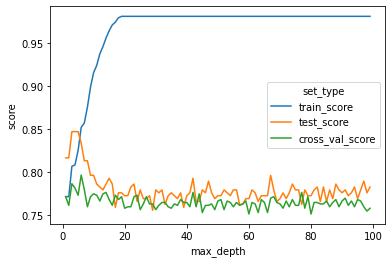

In [27]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [28]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.771751
199,2,cross_val_score,0.761681
200,3,cross_val_score,0.786849
201,4,cross_val_score,0.781821
202,5,cross_val_score,0.773445
203,6,cross_val_score,0.796905
204,7,cross_val_score,0.780112
205,8,cross_val_score,0.760028
206,9,cross_val_score,0.771723
207,10,cross_val_score,0.775126


In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
# Указываем оптимальную глубину дерева
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [32]:
# Проверяем score дерева по КВ
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.8

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Ищем наилучшие параметры критерия и глубины для дерева используя КВ 

In [35]:
clf = tree.DecisionTreeClassifier()

In [36]:
parametrs = {'criterion': ["gini", "entropy"], 'max_depth': range(1, 30)}

In [37]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, )

In [38]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [39]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [40]:
best_clf = grid_search_cv_clf.best_estimator_

In [41]:
# Получили точность дерева с найденными параметрами
best_clf.score(X_test, y_test)

0.8305084745762712

In [42]:
# Смотрим Precision и Recall

In [43]:
from sklearn.metrics import precision_score, recall_score

In [44]:
y_pred = best_clf.predict(X_test)

In [45]:
precision_score(y_test, y_pred)

0.7766990291262136

In [46]:
recall_score(y_test, y_pred)

0.7476635514018691

In [47]:
# Обучаем дерево используя больше переменных у параметров

In [48]:
clf = tree.DecisionTreeClassifier()

In [82]:
parametrs={'max_depth': range(1, 12, 1), 'min_samples_split': range(2, 52, 10), 'min_samples_leaf': range(1, 51, 10)}

In [83]:
search = GridSearchCV(clf, parametrs, cv=5)

In [84]:
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 12),
                         'min_samples_leaf': range(1, 51, 10),
                         'min_samples_split': range(2, 52, 10)})

In [74]:
search.best_params_

{'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [75]:
best_clf = search.best_estimator_

In [76]:
import seaborn as sns

In [77]:
sns.set(rc={'figure.figsize': (35, 29)})

[Text(0.5147058823529411, 0.9166666666666666, 'X[6] <= 0.5\ngini = 0.478\nsamples = 596\nvalue = [361, 235]'),
 Text(0.2647058823529412, 0.75, 'X[0] <= 2.5\ngini = 0.396\nsamples = 217\nvalue = [59, 158]'),
 Text(0.14705882352941177, 0.5833333333333334, 'X[4] <= 28.856\ngini = 0.116\nsamples = 113\nvalue = [7, 106]'),
 Text(0.08823529411764706, 0.4166666666666667, 'X[1] <= 43.0\ngini = 0.219\nsamples = 48\nvalue = [6, 42]'),
 Text(0.058823529411764705, 0.25, 'X[1] <= 27.5\ngini = 0.142\nsamples = 39\nvalue = [3, 36]'),
 Text(0.029411764705882353, 0.08333333333333333, 'gini = 0.245\nsamples = 21\nvalue = [3, 18]'),
 Text(0.08823529411764706, 0.08333333333333333, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.11764705882352941, 0.25, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.20588235294117646, 0.4166666666666667, 'X[3] <= 1.5\ngini = 0.03\nsamples = 65\nvalue = [1, 64]'),
 Text(0.17647058823529413, 0.25, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.23529411764

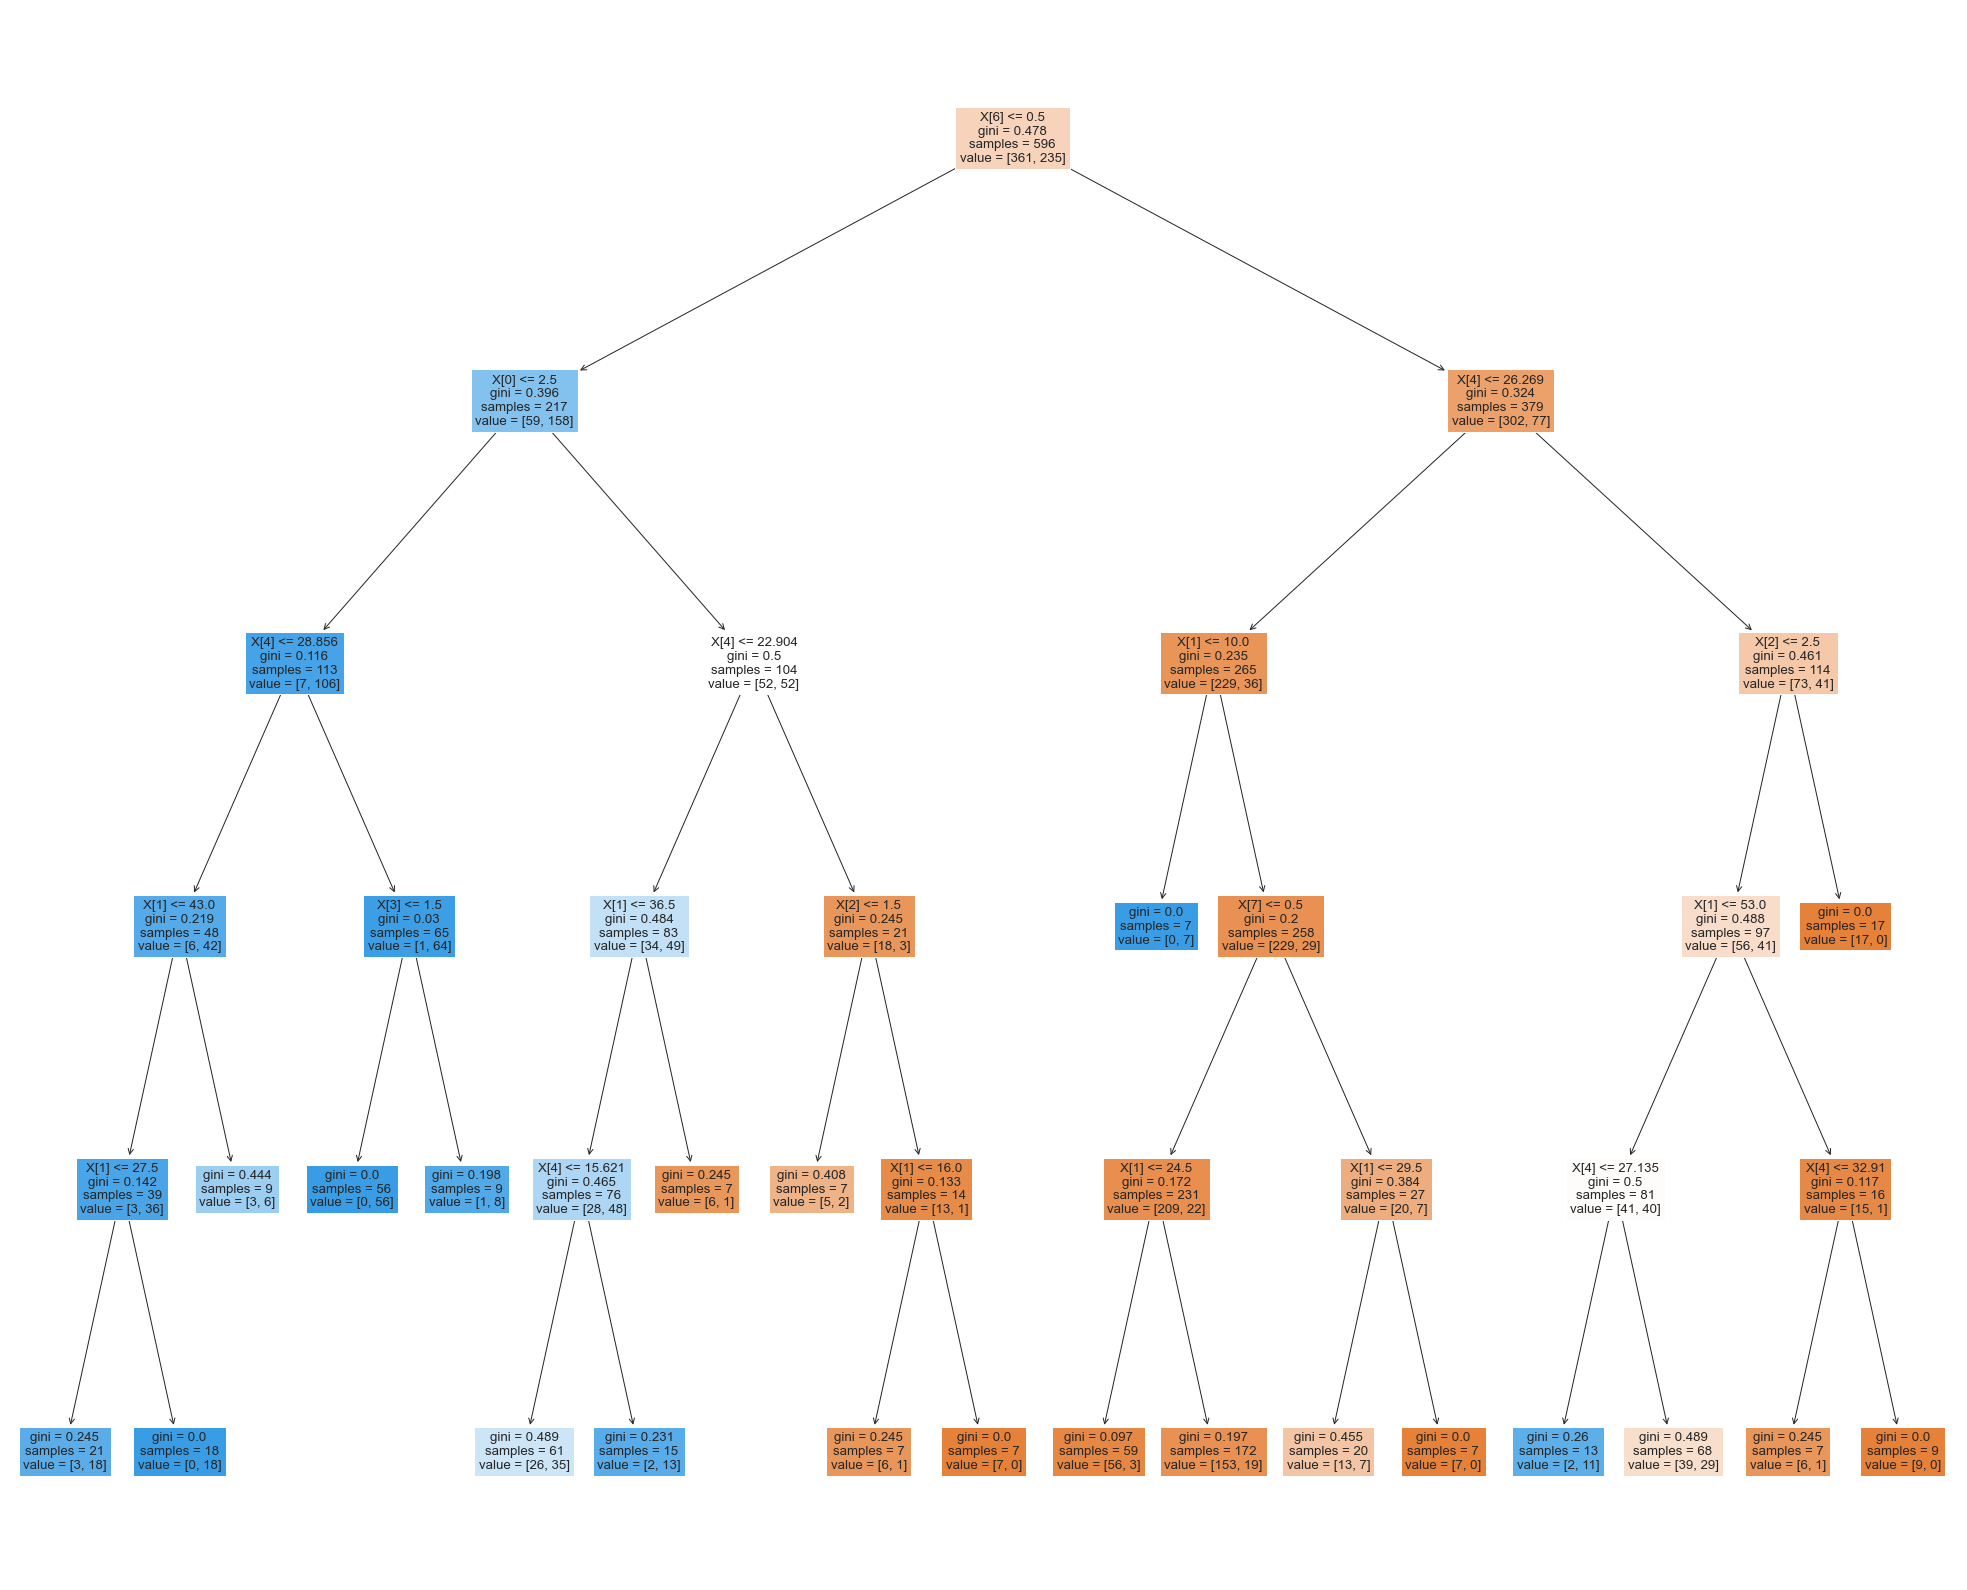

In [78]:
tree.plot_tree(best_clf, filled=True)

In [79]:
y_pred = best_clf.predict(X_test)

In [80]:
precision_score(y_test, y_pred)

0.8144329896907216

In [81]:
recall_score(y_test, y_pred)

0.7383177570093458